<h1>Multi Layer Perceptron for MNIST</h1>
<h3>Goal:</h3>
<p>The following project is a simple one. We are building an MLP to classify MNIST, hand-written digits, data. We first import the data from <i>tensorflow</i> and normalize it to have numbers between 0 and 1. We then build the network as such:</p>
<ul>
    <li>Input layer (784 nodes), hidden layer (256 nodes), hidden layer (128 nodes), output layer (10 nodes)</li>
    <li>ReLu activation between hidden layers</li>
    <li>Softmax activation from the last hidden layer to the output layer</li>
    <li>Adam optimizer</li>
    <li>Sparse Categorial Cross Entropy loss function (does one-hot-encoding in the background)</li>
</ul>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

<h3>Import the data and plot one digit</h3>
<p>The plotting is simply for nice visuals that the data was imported properly</p>

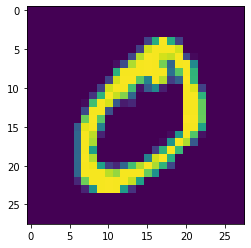

In [9]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
plt.imshow(x_train[1])

<h3>Reshape the data and normalize</h3>
<p>The data comes as a matrix representing the pixels and so lines 2 and 3 here are flattening them to have a vector rather than matrix</p>

In [4]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2])
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2])
x_train = x_train/255
x_test = x_test/255

<h3>Next, we create the MLP model and compile it</h3>

In [5]:
# create model
model = tf.keras.Sequential()
model.add(tf.keras.Input(x_train.shape[1]))
# add a hidden layer
model.add(tf.keras.layers.Dense(256, activation="sigmoid"))
# add a hidden layer
model.add(tf.keras.layers.Dense(128, activation="sigmoid"))
# add the output layer
model.add(tf.keras.layers.Dense(10, activation="sigmoid"))
# compile the model
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"]
)

<h3>The following is a quick look at a summary of the model</h3>

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


<h3>The final step is to train the model using the <i>fit</i> method</h3>

In [ ]:
# The number of epochs was chosen arbitrarily.
model.fit(x_train, y_train, epochs=6)

Epoch 1/6


C:\Users\luizm\AppData\Roaming\Python\Python39\site-packages\keras\backend.py:4906: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  warnings.warn(


1875/1875 [==============================] - 5s 2ms/step - loss: 0.3773 - accuracy: 0.8959
Epoch 2/6
 943/1875 [==============>...............] - ETA: 2s - loss: 0.1654 - accuracy: 0.9506

<h3>Lastly, we make predictions over the testing data and check the accuracy</h3>
<p>We first make a prediction and then use the built in evaluation method that will make predictions on the test set and then compute the accuracy.</p>

In [ ]:
predictions = model.predict(x_test)
test_loss, test_acc = model.evaluate(x_test, y_test)